In [1]:
import sys
sys.path.append("..")
from semantic_val.datamodules.processing import MakeBuildingTargets
import laspy
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


In [2]:
las_dir = "/var/data/cgaydon/data/202110_building_val/logs/runs/2021-11-15/16-27-19/validation_preds/"
make_targets = MakeBuildingTargets()
target_list = []
proba_list = []
for filepath in glob.glob(las_dir + "*.las"):
    las = laspy.read(filepath)
    target = {"y":las.classification.copy()}
    target_list.append(make_targets(target, keys = "y")["y"])
    proba_list.append(las["BuildingsProba"])
targets = np.concatenate(target_list)
probas = np.concatenate(proba_list)

In [39]:
prob_true, prob_pred = calibration_curve(targets, probas, n_bins=100, strategy="uniform")  # 47 seconds

In [47]:
ECE = np.mean(np.abs(prob_true - prob_pred))
lower = prob_pred < 0.5
lower_ECE = np.mean(np.abs(prob_true[lower] - prob_pred[lower]))
middle = (prob_pred>=0.5) & (prob_pred<0.9)
middle_ECE = np.mean(np.abs(prob_true[middle] - prob_pred[middle]))
higher = prob_pred >=0.9
higher_ECE = np.mean(np.abs(prob_true[higher] - prob_pred[higher]))
print(ECE, lower_ECE, middle_ECE, higher_ECE)

0.15290264779378376 0.20832813821592475 0.05708677870146985 0.25903867205233444


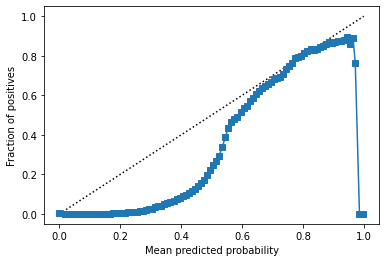

In [41]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay(prob_true, prob_pred, probas)
disp.plot()

(array([233338., 234629., 233913., 236666., 224658., 202359., 176467.,
         60563.,   7800.,    567.]),
 array([0.70000005, 0.73000004, 0.76000004, 0.79000003, 0.82000003,
        0.85000002, 0.88000002, 0.91000001, 0.94000001, 0.97      ,
        1.        ]),
 <BarContainer object of 10 artists>)

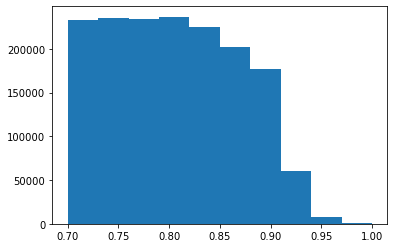

In [25]:
high = probas[probas >=0.70]
plt.hist(high)

In [38]:
# prob_true, prob_pred = calibration_curve(targets, probas, n_bins=2000, strategy="quantile")  # X seconds
# disp = CalibrationDisplay(prob_true, prob_pred, probas)
# disp.plot()

0.05777376225463669 0.05747976932681683 0.08276316111932441


In [37]:
sorted(prob_pred)

[0.0018166363136370072,
 0.019421164125758065,
 0.020355094212021366,
 0.020846054891833863,
 0.02118000554868423,
 0.021421211849484593,
 0.021589960408644155,
 0.021684893131809727,
 0.021705932915210724,
 0.021705936640501022,
 0.02170594409108162,
 0.021706082578616785,
 0.02174829607674364,
 0.021847406818571027,
 0.021968424126293167,
 0.022104870029519805,
 0.022254379307918657,
 0.022415629204992505,
 0.02258738814276424,
 0.022769504343233965,
 0.02296125234484877,
 0.023162292529485002,
 0.023372369583901015,
 0.023591163160163325,
 0.023818640243156726,
 0.024054174029202093,
 0.024297050369178626,
 0.024548025315289813,
 0.024806667473936617,
 0.02507222294170708,
 0.025345045983747604,
 0.02562477692925218,
 0.025911026996595962,
 0.026203624660393686,
 0.026502763636022157,
 0.026808529187359736,
 0.027120078429793224,
 0.02743766604620629,
 0.027760485227136034,
 0.02808869274061787,
 0.02842288755002026,
 0.02876224409168509,
 0.029106710877999445,
 0.02945595732885945,